In [1]:
import scipy.stats as gd
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
data_point = \
[(1,2),
(3,3),
(2,2),
(8,8),
(6,6),
(7,7),
(-3,-3),
(-2,-4),
(-7,-7)]

In [3]:
data_point = [np.array(list(e)) for e in data_point ]
data_point

[array([1, 2]),
 array([3, 3]),
 array([2, 2]),
 array([8, 8]),
 array([6, 6]),
 array([7, 7]),
 array([-3, -3]),
 array([-2, -4]),
 array([-7, -7])]

In [4]:
def prob(x,m,v):
    a = x - m
    v_inv = np.linalg.inv(v)
    b = a.dot(v_inv).dot(a)
    b *=-1/2
    bon = np.exp(b)
    lang = np.sqrt(np.linalg.det(2*math.pi*v))
    return bon/lang

In [5]:
def expectation(data,mean,variance,weight):
    w = {}

    for n in range(len(data)):
        sum_w = 0
        for j in range(len(weight)):
            w[n,j] = prob(data[n],mean[j],variance[j])*weight[j]

            sum_w += w[n,j]

        for j in range(len(weight)):
            w[n,j] /= sum_w

    
    return w

In [6]:
def maximization(w,data,mean):
    weight=[]
    for j in range(len(mean)):
        sum_v = 0
        for n in range(len(data)):
            sum_v += w[n,j]
        weight.append(sum_v/len(data))
    
    mean_n =[]
    for j in range(len(mean)):
        sum_v_bon = 0
        sum_v_lang = 0
        for n in range(len(data)):
            sum_v_bon += w[n,j]*data[n]
            sum_v_lang += w[n,j]
        
        mean_n.append(sum_v_bon/sum_v_lang)
    variance = []
    for j in range(len(mean)):
        sum_v_bon = 0
        sum_v_lang = 0
        for n in range(len(data)):
            sum_v_bon += w[n,j]*(np.outer(data[n]-mean[j],data[n]-mean[j]))
            sum_v_lang += w[n,j]
        
        variance.append(sum_v_bon/sum_v_lang)
    variance_n = []
    for v in variance:
        a = np.zeros_like(v)
        for i in range(2):
            a[i][i] = v[i][i]
        variance_n.append(a)

    return (weight,mean_n,variance_n)

In [7]:
def log_likelihood(data,mean,variance,weight):
    sum_v = 0
    for i in range(len(data)):
        for j in range(len(mean)):
            sum_v+=np.log(prob(data[i],mean[j],variance[j])*weight[j])
    return sum_v

# Using 3 mixtures

## Initialization

In [8]:
# using 3 mixtures
# init
mean = [(3,3),(2,2),(-3,-3)]
mean = [np.array(list(e)) for e in mean ]
variance = [np.identity(2),np.identity(2),np.identity(2)]
weight = [1/3,1/3,1/3]
log_likeli = []

## iteration 1

In [9]:
# iteration 1
w = expectation(data=data_point,mean=mean,variance=variance,weight=weight)
(weight,mean,variance)=maximization(w,data_point,mean)
log_likeli.append(log_likelihood(data_point,mean,variance,weight))
print("iteration 1")
print("w[i,j]")
a = [print(key,w[key]) for key in w]
print('mj')
print(weight)
print('mean')
print(mean)
print("variance")
a=[print(v) for v in variance]

iteration 1
w[i,j]
(0, 0) 0.11920292180570967
(0, 1) 0.8807970763788322
(0, 2) 1.815458084611521e-09
(1, 0) 0.7310585786300048
(1, 1) 0.2689414213699951
(1, 2) 1.6957070633777097e-16
(2, 0) 0.2689414213672646
(2, 1) 0.7310585786225826
(2, 2) 1.0152900501910812e-11
(3, 0) 0.9999832985781519
(3, 1) 1.670142184809518e-05
(3, 2) 2.031058740599438e-42
(4, 0) 0.9990889488055994
(4, 1) 0.0009110511944006455
(4, 2) 5.375284534993953e-32
(5, 0) 0.9998766054240137
(5, 1) 0.0001233945759862317
(5, 2) 3.3052927212335575e-37
(6, 0) 2.319522830211355e-16
(6, 1) 1.388794386477114e-11
(6, 2) 0.9999999999861118
(7, 0) 2.319522830211355e-16
(7, 1) 1.3887943864771144e-11
(7, 2) 0.9999999999861118
(8, 0) 3.305700626760734e-37
(8, 1) 5.900090541597061e-29
(8, 2) 1.0
mj
[0.45757241940119386, 0.20909424706571345, 0.33333333353309275]
mean
[array([5.78992692, 5.81887265]), array([1.67718211, 2.14523106]), array([-4.        , -4.66666666])]
variance
[[12.31988634  0.        ]
 [ 0.         12.23304914]]
[[0.62

In [10]:
s = 0
for i in range(9):
    s+=w[i, 0]
    print('w[',i,', 0] = ',w[i,0])
print(s)

w[ 0 , 0] =  0.11920292180570967
w[ 1 , 0] =  0.7310585786300048
w[ 2 , 0] =  0.2689414213672646
w[ 3 , 0] =  0.9999832985781519
w[ 4 , 0] =  0.9990889488055994
w[ 5 , 0] =  0.9998766054240137
w[ 6 , 0] =  2.319522830211355e-16
w[ 7 , 0] =  2.319522830211355e-16
w[ 8 , 0] =  3.305700626760734e-37
4.1181517746107446


## iteration 2

In [11]:
# iteration 2
w = expectation(data=data_point,mean=mean,variance=variance,weight=weight)
(weigh,mean,variance)=maximization(w,data_point,mean)
log_likeli.append(log_likelihood(data_point,mean,variance,weight))
print("iteration 2")
print("w[i,j]")
a = [print(key,w[key]) for key in w]
print('mj')
print(weight)
print('mean')
print(mean)
print("variance")
a=[print(v) for v in variance]

iteration 2
w[i,j]
(0, 0) 0.018129462193579398
(0, 1) 0.9815829978048423
(0, 2) 0.000287540001578418
(1, 0) 0.5644940614601115
(1, 1) 0.43538062195584154
(1, 2) 0.0001253165840471524
(2, 0) 0.019284694324428982
(2, 1) 0.9806335009045655
(2, 2) 8.180477100556219e-05
(3, 0) 0.9999999999949608
(3, 1) 4.708266849834785e-62
(3, 2) 5.03915977913325e-12
(4, 0) 0.9999999898249619
(4, 1) 3.822838980144731e-27
(4, 2) 1.0175038152685764e-08
(5, 0) 0.9999999997509935
(5, 1) 7.32691443566828e-43
(5, 2) 2.490064942620648e-10
(6, 0) 0.0015979515195400575
(6, 1) 7.697530185578986e-45
(6, 2) 0.99840204848046
(7, 0) 0.0015506975301093418
(7, 1) 5.896121181109588e-58
(7, 2) 0.9984493024698907
(8, 0) 3.590912431540865e-06
(8, 1) 1.8900565406902912e-144
(8, 2) 0.9999964090875685
mj
[0.45757241940119386, 0.20909424706571345, 0.33333333353309275]
mean
[array([6.30842698, 6.31259558]), array([1.77218759, 2.1815904 ]), array([-4.00062813, -4.66675525])]
variance
[[3.24482139 0.        ]
 [0.         3.18737779

## iteration 3

In [12]:
# iteration 3
w = expectation(data=data_point,mean=mean,variance=variance,weight=weight)
(weigh,mean,variance)=maximization(w,data_point,mean)
log_likeli.append(log_likelihood(data_point,mean,variance,weight))
print("iteration 3")
print("w[i,j]")
a = [print(key,w[key]) for key in w]
print('mj')
print(weight)
print('mean')
print(mean)
print("variance")
a=[print(v) for v in variance]


iteration 3
w[i,j]
(0, 0) 0.00026375427348394913
(0, 1) 0.9997285651004653
(0, 2) 7.680626050715161e-06
(1, 0) 0.19253373945598334
(1, 1) 0.8074654903947993
(1, 2) 7.70149217453722e-07
(2, 0) 0.0007061837481367468
(2, 1) 0.9992923761278399
(2, 2) 1.440124023216282e-06
(3, 0) 1.0
(3, 1) 5.019680170679443e-64
(3, 2) 2.981405119017472e-19
(4, 0) 0.9999999999999559
(4, 1) 3.3549261331836194e-28
(4, 2) 4.4014429065749844e-14
(5, 0) 0.9999999999999998
(5, 1) 2.1016057701630252e-44
(5, 2) 1.1100960997670575e-16
(6, 0) 5.54655628560553e-12
(6, 1) 1.7965301556749123e-47
(6, 2) 0.9999999999944534
(7, 0) 3.552458929647686e-12
(7, 1) 1.4035975571260367e-60
(7, 2) 0.9999999999964476
(8, 0) 1.2460041524072564e-23
(8, 1) 1.4330345267427225e-151
(8, 2) 1.0
mj
[0.45757241940119386, 0.20909424706571345, 0.33333333353309275]
mean
[array([6.75724205, 6.75732464]), array([1.93149332, 2.28771402]), array([-3.99998252, -4.66664443])]
variance
[[1.74190348 0.        ]
 [0.         1.73738404]]
[[0.66461987 0.

# Plot log likelihood

[-1117.5844558790411, -1290.616032574544, -1163.0721675487678]


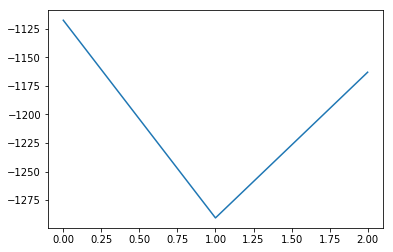

In [13]:
plt.plot(log_likeli)
print(log_likeli)
plt.show()

# using 2 mixtures

## Initialization

In [14]:
# using 2 mixtures
# init
mean = [(3,3),(-3,-3)]
mean = [np.array(list(e)) for e in mean ]
variance = [np.identity(2),np.identity(2)]
weight = [0.5,0.5]
log_likeli = []

## iteration 1

In [15]:
# iteration 1
w = expectation(data=data_point,mean=mean,variance=variance,weight=weight)
(weigh,mean,variance)=maximization(w,data_point,mean)
log_likeli.append(log_likelihood(data_point,mean,variance,weight))
print("iteration 1")
print("w[i,j]")
a = [print(key,w[key]) for key in w]
print('mj')
print(weight)
print('mean')
print(mean)
print("variance")
a=[print(v) for v in variance]

iteration 1
w[i,j]
(0, 0) 0.9999999847700205
(0, 1) 1.5229979512760346e-08
(1, 0) 0.9999999999999998
(1, 1) 2.319522830243569e-16
(2, 0) 0.9999999999622486
(2, 1) 3.775134544136581e-11
(3, 0) 1.0
(3, 1) 2.0310926627348106e-42
(4, 0) 1.0
(4, 1) 5.380186160021139e-32
(5, 0) 1.0
(5, 1) 3.305700626760734e-37
(6, 0) 2.319522830243569e-16
(6, 1) 0.9999999999999998
(7, 0) 2.3195228302435686e-16
(7, 1) 0.9999999999999998
(8, 0) 3.305700626760734e-37
(8, 1) 1.0
mj
[0.5, 0.5]
mean
[array([4.50000001, 4.66666667]), array([-3.99999997, -4.66666663])]
variance
[[9.16666668 0.        ]
 [0.         8.66666669]]
[[5.66666672 0.        ]
 [0.         5.66666677]]


## iteration 2

In [16]:
# iteration 2
w = expectation(data=data_point,mean=mean,variance=variance,weight=weight)
(weigh,mean,variance)=maximization(w,data_point,mean)
log_likeli.append(log_likelihood(data_point,mean,variance,weight))
print("iteration 2")
print("w[i,j]")
a = [print(key,w[key]) for key in w]
print('mj')
print(weight)
print('mean')
print(mean)
print("variance")
a=[print(v) for v in variance]

iteration 2
w[i,j]
(0, 0) 0.9900095473167336
(0, 1) 0.009990452683266395
(1, 0) 0.9998453037159747
(1, 1) 0.00015469628402529613
(2, 0) 0.9972514943660028
(2, 1) 0.0027485056339971647
(3, 0) 0.9999999999874414
(3, 1) 1.2558677717236789e-11
(4, 0) 0.9999999873362906
(4, 1) 1.2663709453430142e-08
(5, 0) 0.9999999995747461
(5, 1) 4.252539832861627e-10
(6, 0) 0.0013875847809303127
(6, 1) 0.9986124152190696
(7, 0) 0.0012310575603659338
(7, 1) 0.9987689424396341
(8, 0) 6.510891833602691e-07
(8, 1) 0.9999993489108165
mj
[0.5, 0.5]
mean
[array([4.50394903, 4.6688226 ]), array([-3.97884626, -4.63910084])]
variance
[[6.9269017  0.        ]
 [0.         5.91286338]]
[[4.76699779 0.        ]
 [0.         3.06866769]]


# iteration 3

In [17]:
# iteration 3
w = expectation(data=data_point,mean=mean,variance=variance,weight=weight)
(weigh,mean,variance)=maximization(w,data_point,mean)
log_likeli.append(log_likelihood(data_point,mean,variance,weight))
print("iteration 3")
print("w[i,j]")
a = [print(key,w[key]) for key in w]
print('mj')
print(weight)
print('mean')
print(mean)
print("variance")
a=[print(v) for v in variance]

iteration 3
w[i,j]
(0, 0) 0.9995815872807361
(0, 1) 0.00041841271926390105
(1, 0) 0.9999988812158732
(1, 1) 1.1187841267936273e-06
(2, 0) 0.9999140463477548
(2, 1) 8.59536522451554e-05
(3, 0) 1.0
(3, 1) 1.4918093355767165e-17
(4, 0) 0.9999999999993495
(4, 1) 6.503969762255396e-13
(5, 0) 0.9999999999999966
(5, 1) 3.4808706501333593e-15
(6, 0) 0.00012165504382365799
(6, 1) 0.9998783449561763
(7, 0) 7.903123402165935e-05
(7, 1) 0.9999209687659784
(8, 0) 2.7383030117192253e-09
(8, 1) 0.9999999972616971
mj
[0.5, 0.5]
mean
[array([4.50004248, 4.66662153]), array([-3.99922144, -4.66562825])]
variance
[[6.91778622 0.        ]
 [0.         5.89077588]]
[[4.67099724 0.        ]
 [0.         2.89666695]]


# Plot log likelihood

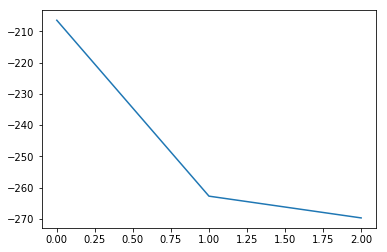

In [18]:
plt.plot(log_likeli)
plt.show()

In [19]:
def spic(a):
    plt.imshow(a,cmap="gray")
    plt.show()
def dist(a,b):
    return np.linalg.norm(a-b)
def debug(*a):
    (b)=a
    print(b)
    pass

In [20]:
data = scipy.io.loadmat("/Users/chompk/WORK/CU_ISE/3rd year/pattern recognition/hw/hw3/facedata.mat")
x=data

(40, 10)
[[48 46 50 ... 50 54 53]
 [47 47 48 ... 37 46 50]
 [46 48 43 ... 33 41 51]
 ...
 [49 49 50 ... 45 46 47]
 [48 48 49 ... 45 46 46]
 [51 48 50 ... 45 45 46]]
(56, 46)


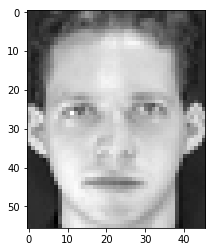

In [21]:
# face data is a 2-dimensional array with size 40x10
print(x['facedata'].shape )
# Each data is indexed by i and j
# where i is the person index
# j is the index of the pose
# In other words, there are 40 people in the database.
# There are 10 images per person.
print(x['facedata'][0,0])
# Each image is a 56 by 46 image
print(x['facedata'][0,0].shape)
# You can see the image by using the imshow in matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(x['facedata'][0,0],cmap="gray")
plt.show()


In [22]:
from skimage import img_as_float
xf = {}
for i in range(40):
    for j in range(10):
        xf[i,j] = img_as_float(x['facedata'][i,j]) 
print (xf[0,0])

[[0.18823529 0.18039216 0.19607843 ... 0.19607843 0.21176471 0.20784314]
 [0.18431373 0.18431373 0.18823529 ... 0.14509804 0.18039216 0.19607843]
 [0.18039216 0.18823529 0.16862745 ... 0.12941176 0.16078431 0.2       ]
 ...
 [0.19215686 0.19215686 0.19607843 ... 0.17647059 0.18039216 0.18431373]
 [0.18823529 0.18823529 0.19215686 ... 0.17647059 0.18039216 0.18039216]
 [0.2        0.18823529 0.19607843 ... 0.17647059 0.17647059 0.18039216]]


In [23]:
# dist 0,0 and 0,1 
print(dist(xf[0,0].reshape(56*46),xf[0,1].reshape(56*46)))

10.037616294165492


In [24]:
# dist 0,0 and 1,0 
print(dist(xf[0,0].reshape(56*46),xf[1,0].reshape(56*46)))

8.173295099737281


# 1
What is the Euclidean distance between xf[0,0] and xf[0,1]? What is
the Euclidean distance between xf[0,0] and xf[1,0]? Does the numbers
make sense? Do you think these numbers will be useful for face verification?

Euclidean distance between xf[0,0] and xf[0,1] is 10.0376162942 <br>
Euclidean distance between xf[0,0] and xf[1,0] is 8.17329509974 <br>
ตัวเลขที่ได้นั้นไม่สมเหตุสมผล เนื่องจากระยะห่างของคนเดี่ยวกันนั้นมากกว่า กับระยะห่างของภาพจากคนละคน จึงไม่น่าจะนำมาทำ face verification ได้

# 2
Write a function that takes in a set of feature vectors T and a set of feature
vectors D, and then output the similarity matrix A. Show the matrix as an
image. Use the feature vectors from the first 3 images from all 40 people
for list T (in order x[0, 0], x[0, 1], x[0, 2], x[1, 0], x[1, 1], ...x[39, 2]). Use the
feature vectors from the remaining 7 images from all 40 people for list D (in
order x[0, 3], x[0, 4], x[0, 5], x[1, 6], x[0, 7], x[0, 8], x[0, 9], x[1, 3], x[1, 4]...x[39, 9]).
We will treat T as our training images and D as our testing images

In [25]:
# 2
def sim_matric(D,T):
    sm=[]
    for a in T:
        row = []
        for b in D:
            row.append(dist(a,b))
        sm.append(row)
    return np.array(sm)

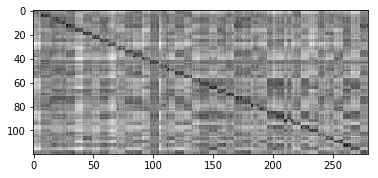

(120, 280)


In [26]:
d = []
t = []
for i in range(40):
    for j in range(3):
        t.append(xf[i,j])
    for j in range(3,10):
        d.append(xf[i,j])
sim = sim_matric(d,t)
spic(sim)
print(sim.shape)

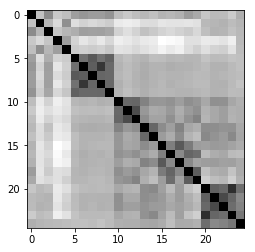

In [27]:
d = []
t = []
for i in [0,1,2,3,4]:
    for j in [0,1,2,3,4]:
        d.append(xf[i,j])
        
spic(sim_matric(d,d))

# 3
From the example similarity matrix above, what does the black square
between [5:10,5:10] suggest about the pictures from person number 2?
What do the patterns from person number 1 say about the images from
person 1?


จากตัวอย่าง บอกได้ว่ารูป 5 รูปแรก ของคนที่ 2 นั้นคล้ายกันเป็นอย่างมากซึ่งต่างจากคนที่ 1 ที่นอกจากภาพที่เป็นภาพเดียวกันแล้วก็ไม่คล้ายกันเลย

In [28]:
# 4
def simple_face_ver(simm,t):
    true_pos = 0
    false_alr = 0
    false_neg = 0
    true_neg = 0

    for consider_person in range(40):
        for consider_picture in range(7):
            for answer in range(40):
                min_dif = min(min(simm[3*answer,(consider_person*7)+consider_picture],simm[(3*answer)+1,(consider_person*7)+consider_picture]),simm[(3*answer)+2,(consider_person*7)+consider_picture])
                act = consider_person == answer
                predict = min_dif< t
                if(act):
                    if(predict):
                        true_pos+=1
                    else:
                        false_neg+=1
                else:
                    if(predict):
                        false_alr+=1
                    else:
                        true_neg+=1
#     (true_pos,false_neg,false_alr,true_neg)
    return (true_pos/(true_pos+false_neg),false_alr/(false_alr+true_neg))
        

In [29]:
simple_face_ver(sim,140)

(1.0, 1.0)

# 4
Write a function that takes in the similarity matrix created from the previous
part, and a threshold t as inputs. The outputs of the function are the
true positive rate and the false alarm rate of the face verification task (280
Test images, tested on 40 people, a total of 11200 testing per threshold).
What is the true positive rate and the false alarm rate for t = 140?

In [30]:
tmax = np.amax(sim)
tmin = np.amin(sim)

In [31]:
# 5
print(tmax)
print(tmin)

17.541726165424688
1.742015342878778


In [32]:
# 5 6
def roc(tmin,tmax,sim):
    point1 = (0,0.0)
    point2 = (0,1.0)
    far_gt_e_tpr = True
    data = {}
    data['roc'] = []
    times = 1000
    for i in range(times):
        t = tmin+((tmax-tmin)*i/times)
        point = simple_face_ver(sim,t)
        e_tpr = 1 - point[0]
        far = point[1]
        if far - e_tpr > 0 and far_gt_e_tpr:
            print(point)
            point1 = point2
            point2 = point
            far_gt_e_tpr = False
        elif far_gt_e_tpr :
            point1 = point2
            point2 = point
        data['roc'].append(point)
    data['p1'] = point1
    data['p2'] = point2
    temp1 = (1-point1[0]+1-point2[0])/2
    temp2 = (point1[1]+point2[1])/2
    data['eer'] =  (temp1+temp2)/2
    return data

In [33]:
roc_1 = roc(tmin,tmax,sim)

(0.9142857142857143, 0.09001831501831502)


In [34]:
def plot_roc(roc_m):
    x = []
    y = []
    for a in roc_m:
        x.append(a[0])
        y.append(a[1])
    plt.plot(y,x)
    plt.show()

# 5
Plot the RoC curve for this simple verification system. What should be
the minimum threshold to generate the RoC curve? What should be the
maximum threshold? Your RoC should be generated from at least 1000
threshold levels equally spaced between the minimum and the maximum.
(You should write a function for this).

minimum threshold is 1.74201534288<br>
maximum threshold is 17.5417261654<br>

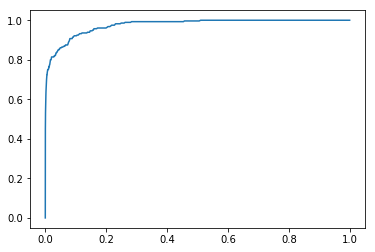

In [35]:
# 5
plot_roc(roc_m=roc_1['roc'])

In [36]:
def recall_rate_at_false_alarm_rate(p,roc):
    for i in roc['roc']:
        if i[1]>p:
            return i[0]

# 6
What is the EER (Equal Error Rate)? What is the recall rate at 0.1% false
alarm rate? (Write this in the same function as the previous question)


In [37]:
# 6
print('ERR :',roc_1['eer'])
print('recall rate :',recall_rate_at_false_alarm_rate(0.001,roc_1))

ERR : 0.08917124542124547
recall rate : 0.5464285714285714


In [38]:
# 7
mean_face = np.zeros_like(xf[0,0])
for i in range(40):
    for j in range(3):
        mean_face  += xf[i,j]
mean_face /= 40*3

mean_face

array([[0.33444444, 0.33598039, 0.33611111, ..., 0.33163399, 0.33084967,
        0.32934641],
       [0.33493464, 0.33633987, 0.33565359, ..., 0.33179739, 0.3319281 ,
        0.33091503],
       [0.33686275, 0.33656863, 0.33607843, ..., 0.33055556, 0.33261438,
        0.3320915 ],
       ...,
       [0.3648366 , 0.36581699, 0.36748366, ..., 0.25205882, 0.25480392,
        0.26107843],
       [0.38650327, 0.38506536, 0.38565359, ..., 0.26130719, 0.26212418,
        0.26228758],
       [0.40150327, 0.40754902, 0.41176471, ..., 0.2780719 , 0.27924837,
        0.27715686]])

# 7
Compute the mean vector from the training images. Show the vector as
an image (use numpy.reshape()). This is typically called the meanface
(or meanvoice for speech signals). You answer should look exactly like the
image shown below.


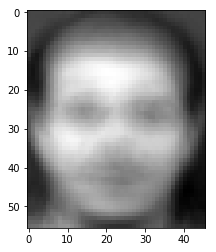

In [39]:
spic(mean_face)

In [40]:
x_hat = []
for i in range(40):
    for j in range(3):
        x_hat.append(xf[i,j].reshape(56*46)-mean_face.reshape(56*46))
x_hat = np.array(x_hat)
mean_face.shape

(56, 46)

# 8
What is the size of the covariance matrix? What is the rank of the covariance
matrix?


covariance matrix size 56x46x56x46 <br>
rank is 119

# 9
What is the size of the Gram matrix? What is the rank of Gram matrix?
If we compute the eigenvalues from the Gram matrix, how many non-zero
eigenvalues do we expect to get?


gram matrix size 120x120 
rank is 119
number of non zero eigenvalue is 119

# 10 
• Is the Gram matrix also symmetric? Why?


symmetric, เพราะ เป็นการคูณกันของ matrix และ transpose 

In [41]:
(evalue,evector) = np.linalg.eigh(x_hat.dot(x_hat.transpose()))
# print(evector)
sorted_evalue = np.flip(evalue,0)
sorted_evector = np.flip(evector,1)
sorted_evector

array([[ 0.07820028, -0.08144841,  0.16838572, ..., -0.03284951,
         0.01171851, -0.09128709],
       [ 0.15633363, -0.06891888,  0.00607299, ..., -0.00712131,
         0.00347436, -0.09128709],
       [ 0.14076739, -0.04460943,  0.08922514, ...,  0.03802993,
         0.01301747, -0.09128709],
       ...,
       [ 0.03542524, -0.08254825, -0.13635891, ..., -0.01356318,
         0.00197116, -0.09128709],
       [ 0.04815903, -0.11167625, -0.06627051, ..., -0.03108812,
        -0.02639082, -0.09128709],
       [ 0.04395375, -0.12893456, -0.07990511, ...,  0.02085834,
         0.01616482, -0.09128709]])

In [42]:
sorted_evalue

array([ 1.42392971e+03,  8.75375177e+02,  5.58624400e+02,  4.07347157e+02,
        3.71021274e+02,  2.63280801e+02,  2.03396990e+02,  1.90965101e+02,
        1.66548056e+02,  1.43570551e+02,  1.22951200e+02,  1.04788229e+02,
        9.36606993e+01,  8.52020934e+01,  8.00790884e+01,  7.22926270e+01,
        6.92896016e+01,  6.55557914e+01,  6.16791259e+01,  5.90743553e+01,
        5.42659430e+01,  5.19180210e+01,  4.60439029e+01,  4.49517564e+01,
        4.38154370e+01,  4.17882938e+01,  4.04839086e+01,  3.80160594e+01,
        3.72939497e+01,  3.42784031e+01,  3.38082909e+01,  3.24110643e+01,
        3.01160763e+01,  2.88090967e+01,  2.76934934e+01,  2.72362796e+01,
        2.63193795e+01,  2.55181270e+01,  2.42531018e+01,  2.33566654e+01,
        2.24888684e+01,  2.22128871e+01,  2.13271981e+01,  2.05964187e+01,
        1.97567698e+01,  1.91068901e+01,  1.86898335e+01,  1.81386227e+01,
        1.79801629e+01,  1.69617092e+01,  1.63867949e+01,  1.56952212e+01,
        1.56409226e+01,  

# 11
Compute the eigenvectors and eigenvalues of the Gram matrix,
v
0 and λ.
Sort the eigenvalues and eigenvectors in descending order so that the first
eigenvalue is the highest, and the first eigenvector corresponds to the best
direction. How many non-zero eigenvectors are there? If you see a very
small value, it is just numerical error and should be treated as zero.



non zreo eigenvalue is 119 

# 12
Plot the eigenvalues. Observe how fast the eigenvalues decrease. In class,
we learned that the eigenvalues is the size of the variance for each eigenvector
direction. If I want to keep 95% of the variance in the data, how
many eigenvectors should I use?


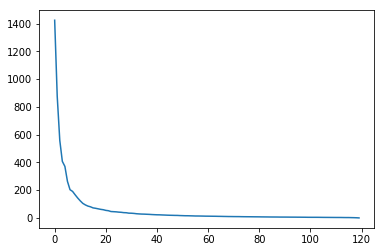

In [43]:
#12
plt.plot(sorted_evalue)
plt.show()

In [44]:
all_variance = sum(sorted_evalue)
keep = 1 
sum_now = sorted_evalue[0]
while(sum_now/all_variance<0.95):
    sum_now+=sorted_evalue[keep]
    keep+=1
print(keep)

64



จะเก็บ 95% variance ต้อง 

In [45]:
keep

64

In [46]:
normalize_sorted_evector = []
for i in range(120):
    normalize_sorted_evector.append(sorted_evector[:,i]/np.linalg.norm(sorted_evector[:,i]))
normalize_sorted_evector = np.array(normalize_sorted_evector)
normalize_sorted_evector

array([[ 0.07820028,  0.15633363,  0.14076739, ...,  0.03542524,
         0.04815903,  0.04395375],
       [-0.08144841, -0.06891888, -0.04460943, ..., -0.08254825,
        -0.11167625, -0.12893456],
       [ 0.16838572,  0.00607299,  0.08922514, ..., -0.13635891,
        -0.06627051, -0.07990511],
       ...,
       [-0.03284951, -0.00712131,  0.03802993, ..., -0.01356318,
        -0.03108812,  0.02085834],
       [ 0.01171851,  0.00347436,  0.01301747, ...,  0.00197116,
        -0.02639082,  0.01616482],
       [-0.09128709, -0.09128709, -0.09128709, ..., -0.09128709,
        -0.09128709, -0.09128709]])

In [47]:
# 13
v = []
for i in range(120):
    p = normalize_sorted_evector[i].dot(x_hat)
    v.append(p)
v = np.array(v)
v

array([[-2.90692076e-01, -2.91566479e-01, -2.68298379e-01, ...,
        -4.68584673e-01, -4.18799766e-01, -4.77063473e-01],
       [-8.67322860e-01, -8.70620791e-01, -8.78100460e-01, ...,
         6.75902397e-01,  7.80773905e-01,  6.85573577e-01],
       [-9.68659611e-01, -9.58892809e-01, -9.58411080e-01, ...,
        -4.54496975e-01, -5.89006715e-01, -5.53631077e-01],
       ...,
       [-5.73088093e-03, -1.25440482e-03,  2.06930805e-03, ...,
         6.82042566e-02, -2.41026337e-03, -4.77973511e-02],
       [-4.67470853e-03, -7.05885963e-04, -7.80618162e-03, ...,
         7.67324688e-03, -1.68405040e-03, -9.98065797e-03],
       [-1.81799020e-15, -1.25593980e-15, -2.49800181e-16, ...,
         1.70002901e-15,  1.81799020e-15,  2.83974233e-15]])

# 13
Compute #»v . Don’t forget to renormalize so that the norm of each vector
is 1 (you can use numpy.linalg.norm). Show the first 10 eigenvectors as
images. Two example eigenvectors are shown below. We call these images
eigenfaces (or eigenvoice for speech signals).

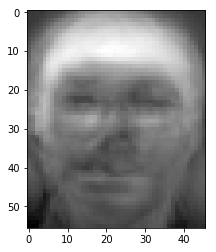

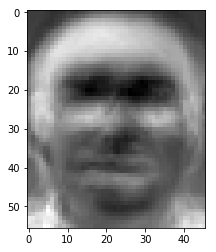

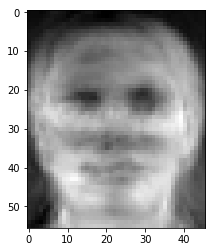

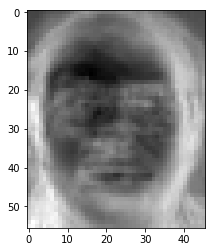

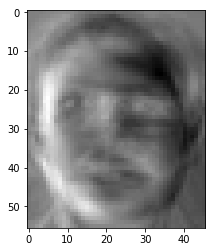

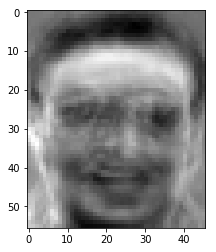

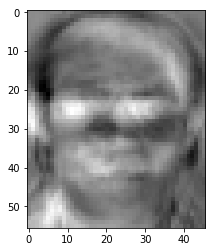

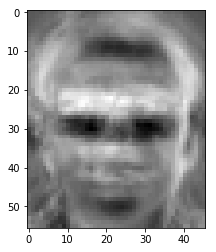

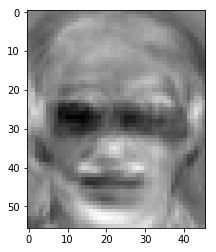

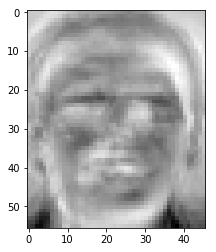

In [48]:

for i in range(10):
    spic(v[i].reshape((56,46)))

# 14
From the image, what do you think the first eigenvector captures? What
about the second eigenvector? Look at the original images, do you think
biggest variance are capture in these two eigenvectors?

รูปที่ 1 จับผม <br>
รูปที่ 2 คือจับคิ้วและดวงตา<br>


In [49]:
new_rep = {}
for i in range(40):
    for j in range(10):
        new_rep[i,j] = v[0:10].dot(xf[i,j].reshape(56*46)-mean_face.reshape(56*46))
new_rep[0,0]

array([ 1.11351706e+02, -7.12979167e+01,  9.40643730e+01, -2.66616073e-02,
        4.65806459e+00, -2.20529366e+01,  1.57386745e+01, -1.74131123e+01,
        2.82185805e+01, -9.62763623e+00])

In [50]:
def get_d_t(rep):
    d2 = []
    t2 = []
    for i in range(40):
        for j in range(3):
            t2.append(rep[i,j])
        for j in range(3,10):
            d2.append(rep[i,j])
    return(d2,t2)

(120, 10)


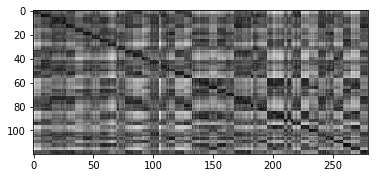

In [51]:
(d,t)= get_d_t(new_rep)
print(np.array(t).shape)
sim2 = sim_matric(d,t)
spic(sim2)

In [52]:
tmax = np.amax(sim2)
tmin = np.amin(sim2)

In [53]:
roc2 = roc(sim=sim2,tmax=tmax,tmin=tmin)

(0.9071428571428571, 0.09294871794871795)


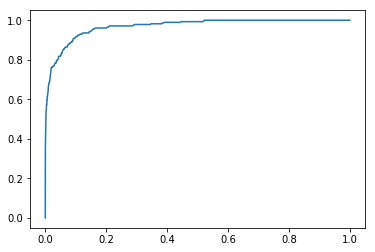

In [54]:
plot_roc(roc2['roc'])

# 15
Find the projection values of all images. Keep the first k = 10 projection
values. Repeat the simple face verification system we did earlier using
these projected values. What is the EER and the recall rate at 0.1%
FAR?


In [55]:
# 15
print("EER : ",roc2['eer'])
print('recall at 0.001: ',recall_rate_at_false_alarm_rate(0.001,roc2))

EER :  0.09260531135531139
recall at 0.001:  0.425


In [56]:
index = 0
min_eer = 1.0
for k in range(5,15):
    print('=== k=',k,'===')
    new_rep = {}
    for i in range(40):
        for j in range(10):
            new_rep[i,j] = v[0:k].dot(xf[i,j].reshape(56*46)-mean_face.reshape(56*46))
    (d,t)= get_d_t(new_rep)
    sim2 = sim_matric(d,t)
    tmax = np.amax(sim2)
    tmin = np.amin(sim2)
    roc2 = roc(sim=sim2,tmax=tmax,tmin=tmin)
    print(roc2['eer'])
    if (roc2['eer']<min_eer):
        index = k
        min_eer = roc2['eer']


=== k= 5 ===
(0.8964285714285715, 0.1054945054945055)
0.10398351648351649
=== k= 6 ===
(0.9, 0.10146520146520147)
0.1002747252747253
=== k= 7 ===
(0.9, 0.1021062271062271)
0.10160256410256412
=== k= 8 ===
(0.9071428571428571, 0.09807692307692308)
0.09583333333333335
=== k= 9 ===
(0.9071428571428571, 0.09294871794871795)
0.09354395604395607
=== k= 10 ===
(0.9071428571428571, 0.09294871794871795)
0.09260531135531139
=== k= 11 ===
(0.9107142857142857, 0.09404761904761905)
0.09219322344322348
=== k= 12 ===
(0.9107142857142857, 0.09166666666666666)
0.09107142857142861
=== k= 13 ===
(0.9107142857142857, 0.09065934065934066)
0.09054487179487183
=== k= 14 ===
(0.9107142857142857, 0.0912087912087912)
0.09086538461538465


# 16
What is the k that gives the best EER? Try k = 5, 6, 7, 8, 9, 10, 11, 12, 13, 14.

The best k is

In [57]:
print(index)

13


# optional

In [58]:
k = 10
p = v[0:k].dot(xf[0,0].reshape(56*46)-mean_face.reshape(56*46))

In [59]:
recon = np.zeros_like([0.0]*2576)
for i in range(k):
    recon += v[i]*p[i]
    

In [60]:
a = mean_face.reshape(56*46)+v[:k].transpose().dot(p.transpose())

In [61]:
def MSE(x,y):
    sum_i= 0
    for i,j in zip(x,y):
        for k,l in zip(i,j):
            sum_i += (k-l)*(k-l)/(56*46)
    return sum_i

• (Optional) Reconstruct the first image using this procedure. Use k = 10,
what is the MSE?


In [62]:
MSE(xf[0,0],a.reshape((56,46)))

10629.674979276922

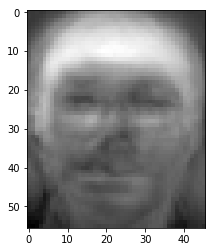

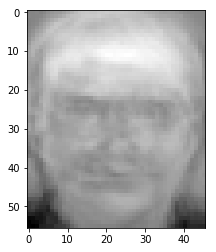

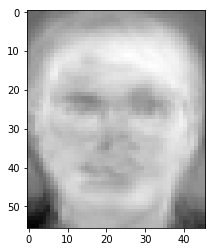

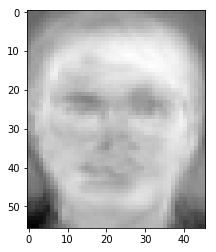

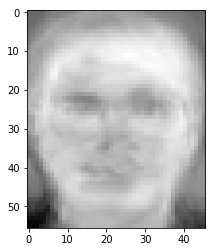

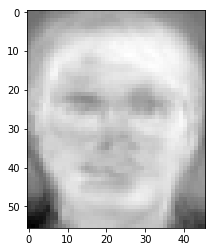

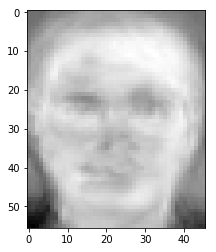

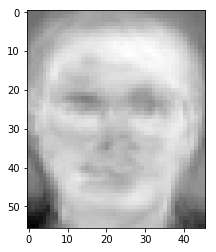

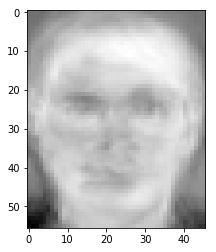

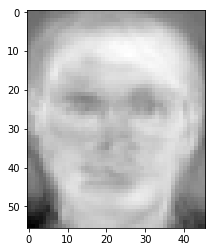

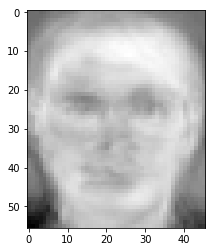

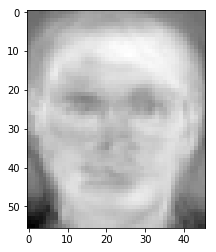

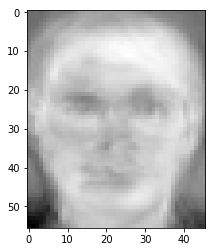

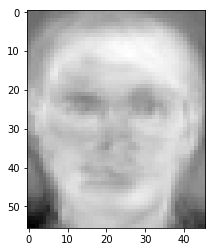

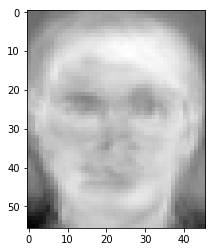

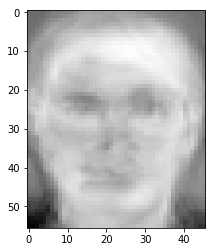

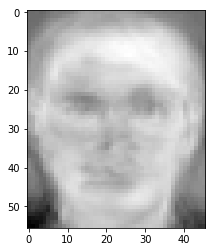

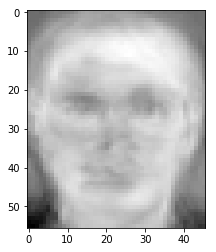

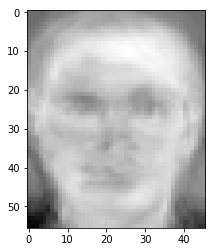

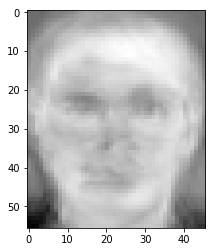

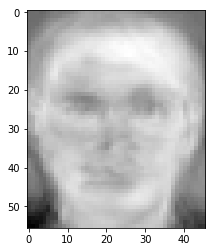

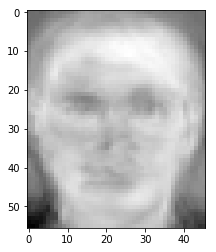

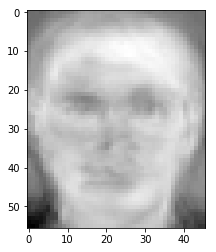

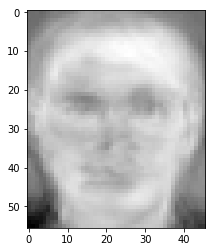

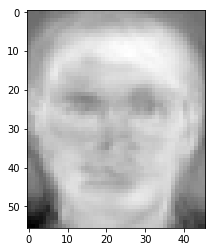

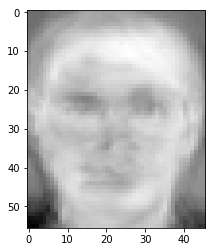

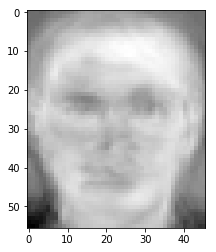

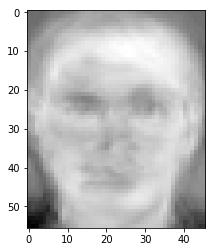

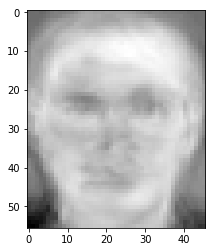

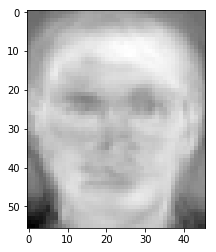

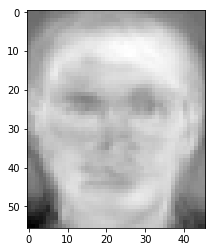

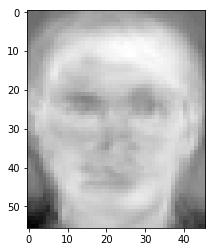

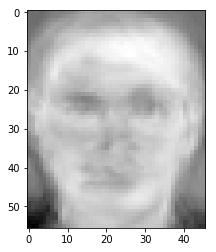

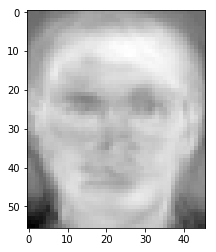

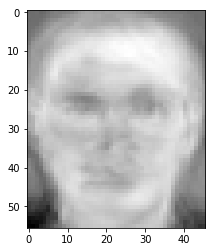

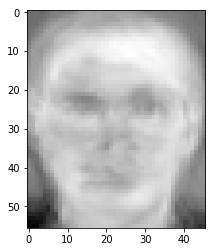

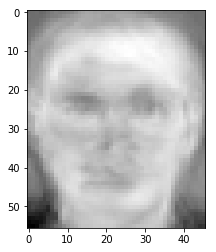

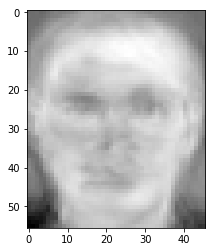

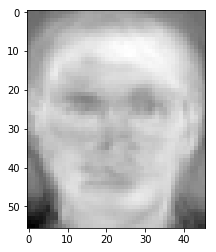

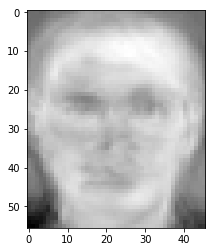

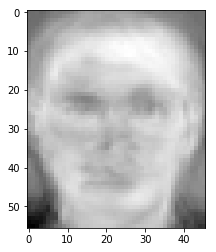

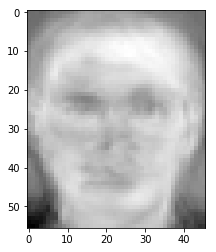

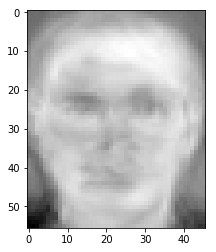

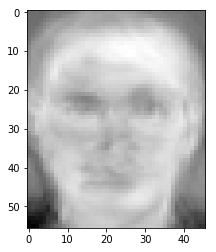

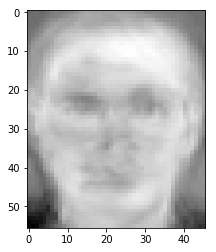

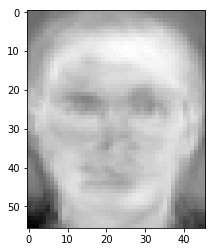

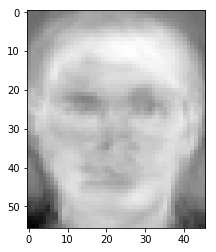

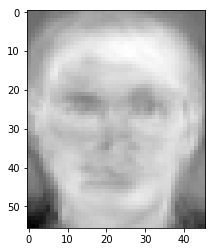

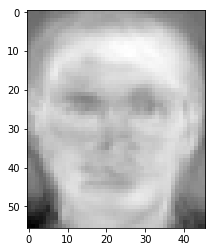

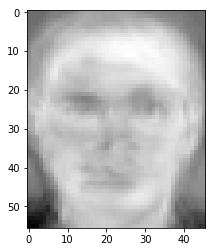

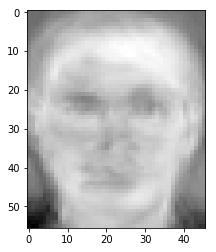

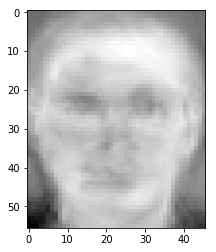

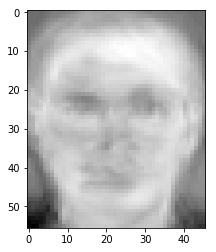

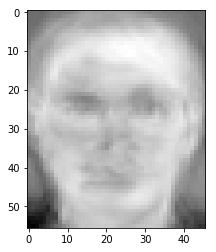

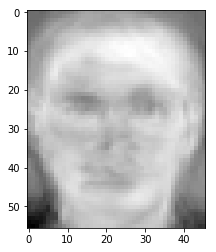

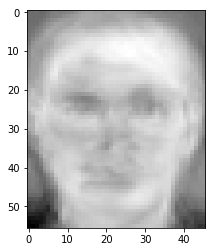

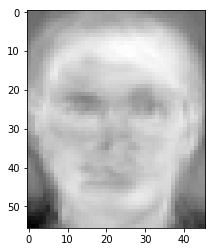

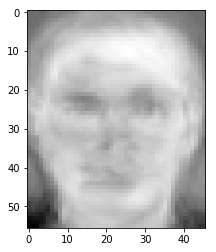

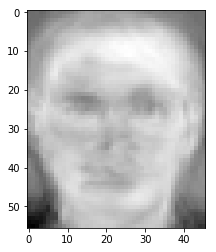

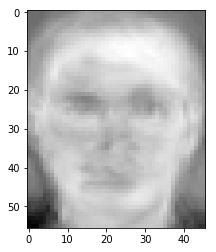

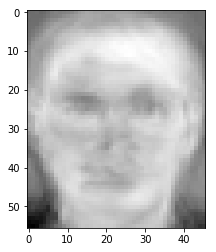

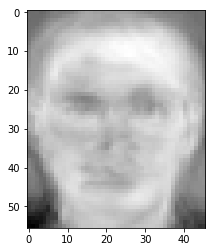

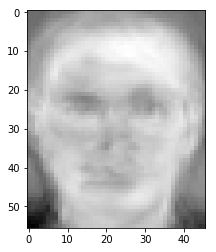

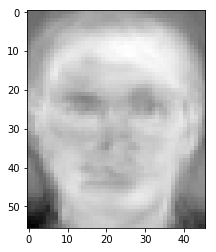

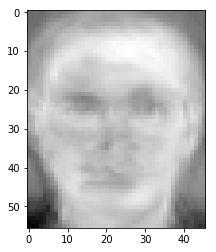

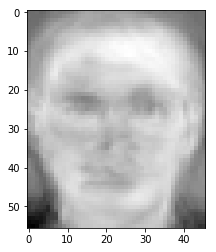

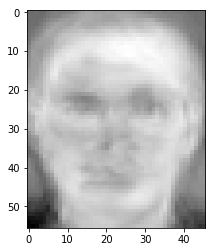

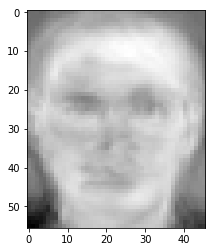

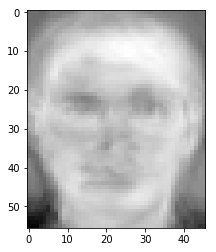

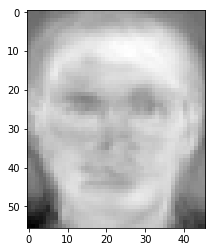

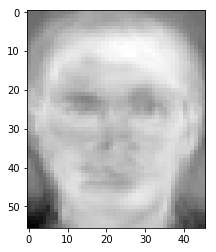

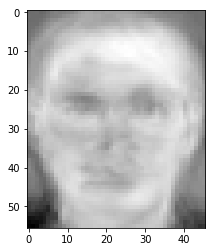

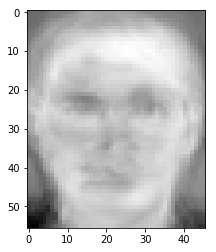

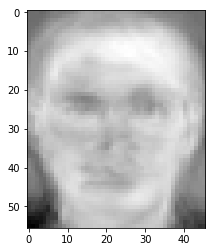

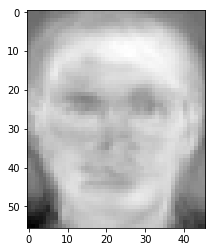

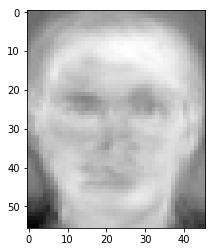

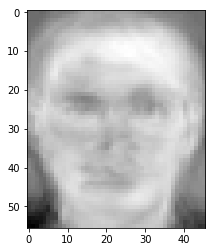

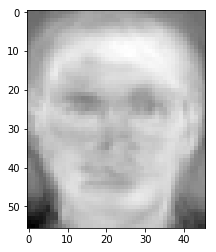

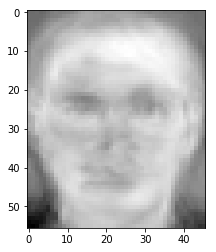

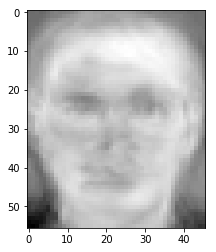

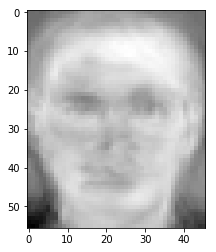

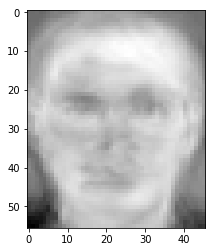

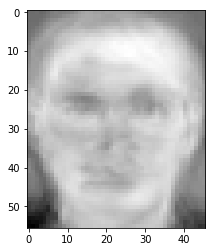

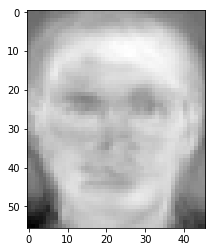

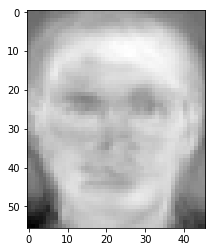

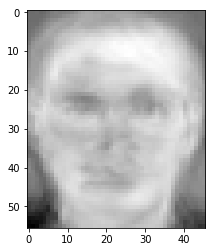

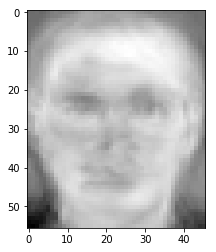

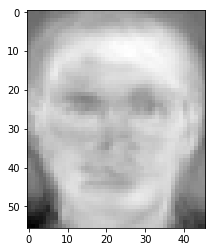

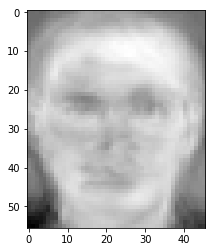

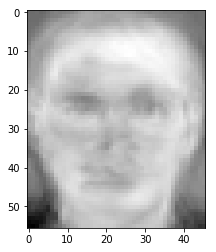

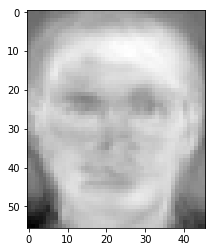

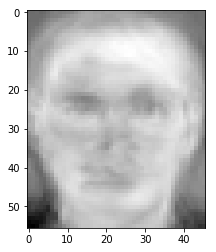

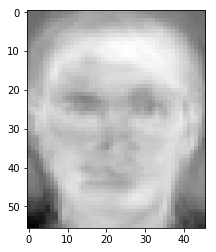

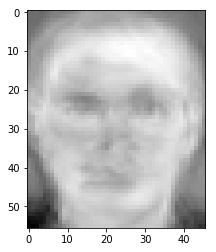

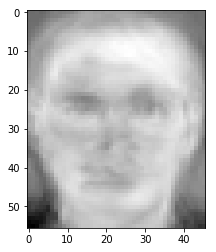

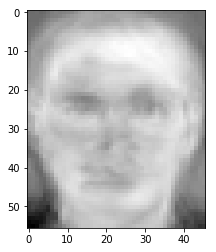

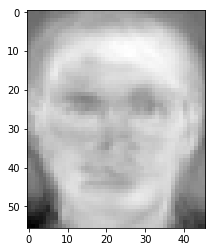

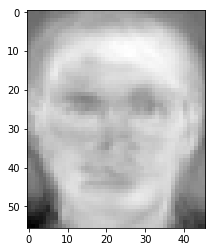

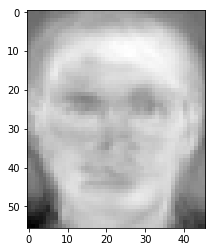

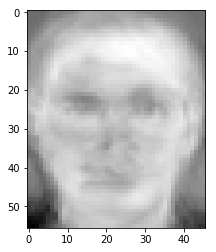

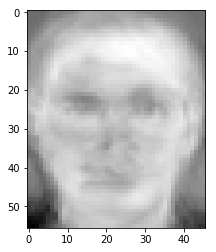

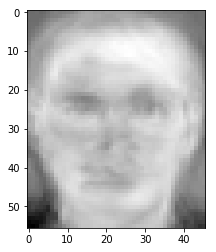

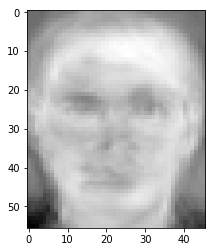

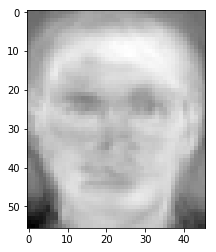

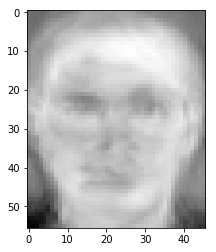

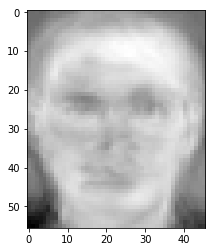

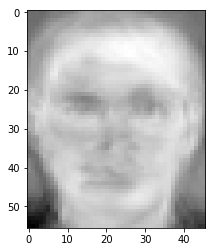

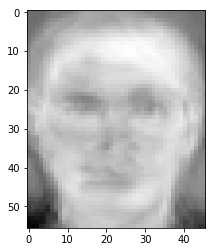

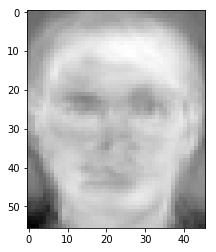

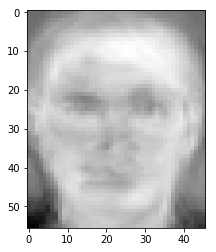

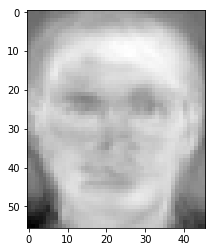

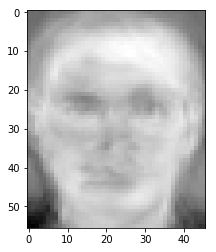

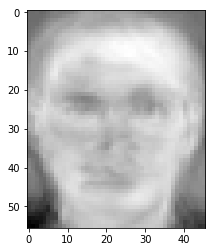

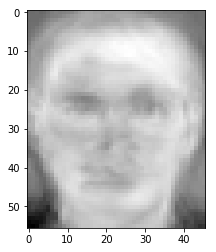

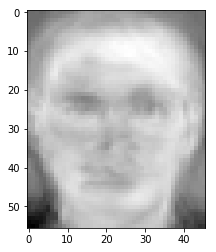

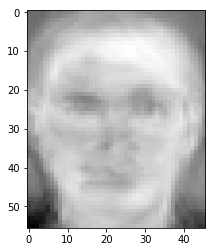

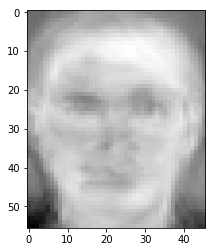

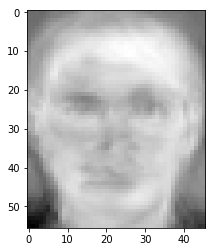

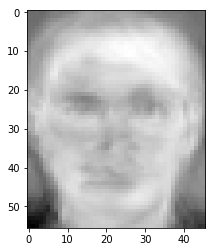

In [86]:
mses = []
for k in range(1,120):
    p = v[0:k].dot(xf[0,0].reshape(56*46)-mean_face.reshape(56*46))
    a = mean_face.reshape(56*46)+v[:k].transpose().dot(p.transpose())
    spic(a.reshape(56,46))
    mses.append(MSE(xf[0,0],a.reshape((56,46))))

- For k values of 1,2,3,...,10,119, show the reconstructed images.
Plot the MSE values.

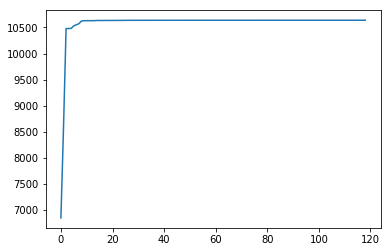

In [64]:
plt.plot(mses)
plt.show()

• (Optional) Consider if we want to store 1,000,000 images of this type.
How much space do we need? If we would like to compress the database
by using the first 10 eigenvalues, how much space do we need? (Assume
we keep the projection values, the eigenfaces, and the meanface as 32bit
floats)


Store data 1000000 images = 1000000 x 56 x 46 x 32bit = 8.2432 x 10^10 bit
Store data (Using 10 eigenvalue) = <br>
= ((10 x (56 x 46)) x 32)  for 10 eigenface<br>
+(10 x 1000000 x32) for new repersentation of data<br>
+(56 x 46 x 32) for mean face
= 3.20906752 x 10^8 bit

# 17
In order to assure that SW is invertible we need to make sure that SW is
full rank. How many PCA dimensions do we need to keep in order for SW
to be full rank? (Hint: How many dimensions does SW have? In order to
be of full rank, you need to have the same number of linearly independent
factors)



Answer 80 dimension


In [65]:
new_rep_lda = []
for i in range(40):
    for j in range(3):
        new_rep_lda.append(v[0:80].dot(xf[i,j].reshape(56*46)))
new_rep_lda = np.array(new_rep_lda)
new_rep_lda[0]

array([ 6.57100987e+02, -4.78828139e+02,  1.33583229e+02,  7.59747119e+01,
        7.66144255e+01, -1.22623359e+01,  6.31342480e+01, -4.19229475e+01,
       -3.66416694e-01, -7.38839098e+01,  2.14809199e+01, -5.60263868e+00,
        9.86583636e+00, -7.26140773e+00,  2.01090128e+00, -1.45272698e+01,
        1.15151129e+00,  1.12134695e+01, -1.05196329e+01, -1.60236868e+01,
        5.14865715e+00, -6.57639329e+00,  2.28067103e+00, -8.76409871e+00,
        7.92556067e+00, -5.23772355e+00,  6.13227729e+00,  3.90884763e+00,
        6.46194813e+00, -6.12865868e+00,  1.68890588e-01, -2.35119218e+00,
       -2.43234535e+00,  4.96915283e+00,  8.96991020e-03,  2.62814596e-01,
       -2.18517279e+00, -2.01946081e-01,  2.59258178e+00, -1.78720313e+00,
        4.38609246e-01,  1.44560597e+00,  6.46474354e+00,  2.28685381e+00,
        4.90630450e-01, -4.41651071e+00, -4.51493991e+00, -8.67881209e-01,
        4.30588402e+00, -6.66997750e-01, -2.32013567e+00, -2.55039086e+00,
        3.97209934e-01,  

In [66]:
pca_mean = np.zeros_like(new_rep_lda[0])
for i in range(120):
    pca_mean+=new_rep_lda[i]
pca_mean/=120
pca_mean

array([ 5.45749281e+02, -4.07530222e+02,  3.95188564e+01,  7.60013735e+01,
        7.19563610e+01,  9.79060071e+00,  4.73955735e+01, -2.45098353e+01,
       -2.85849972e+01, -6.42562736e+01,  1.91427370e+01, -5.56127091e+00,
        8.43496257e+00, -1.72142779e+00, -7.92223518e+00, -1.24295344e+01,
       -6.10430497e-01,  8.88734832e+00, -9.01586613e+00, -1.14659234e+01,
        2.65600776e+00, -2.21115830e+00, -2.05762284e+00, -5.35792639e+00,
        3.80458058e+00,  1.12541677e+00, -8.70368949e-01,  4.39330523e+00,
        2.64290225e+00, -5.94611489e+00, -1.29616753e-01, -8.48507332e-01,
       -2.46533303e+00,  2.86457421e+00,  1.42202747e+00, -3.61814492e+00,
       -1.86274214e-01, -1.42023294e+00, -3.75435122e-01, -8.89191234e-01,
        2.44262419e+00,  5.08020502e-01,  1.55647199e+00,  2.42111121e+00,
        9.63672168e-01, -3.97208809e+00, -2.26513978e+00, -2.90770947e+00,
        4.14673070e+00,  1.17670279e+00,  1.27112312e+00, -3.88642324e+00,
       -6.06161295e-01,  

In [67]:
class_mean = []
for i in range(40):
    now = np.zeros_like(new_rep_lda[0])
    for j in [0,1,2]:
        now += new_rep_lda[(3*i)+j]
    class_mean.append(now/3)
class_mean = np.array(class_mean)
class_mean

array([[ 7.23883508e+02, -4.64422813e+02,  8.86189326e+01, ...,
         6.24084270e-01,  6.34070022e-01,  3.05535083e-01],
       [ 6.20066075e+02, -3.75317732e+02,  1.08958982e+02, ...,
        -1.29856866e-01,  6.44595163e-01, -2.57036547e-01],
       [ 5.52495984e+02, -4.59284302e+02,  1.29939571e+01, ...,
         8.93991218e-02,  4.55386314e-01, -3.63306647e-01],
       ...,
       [ 4.22168243e+02, -4.75221381e+02,  1.76126521e+01, ...,
        -2.19375362e-02, -4.76583889e-02,  3.08969934e-01],
       [ 3.54901602e+02, -2.48243852e+02, -1.16731328e-01, ...,
         3.05293937e-01,  4.52936144e-01,  7.70579427e-04],
       [ 6.06284339e+02, -5.01825359e+02, -1.30913707e+01, ...,
         5.90438551e-02,  4.07837675e-01, -5.47186780e-01]])

In [68]:
sb = np.outer((class_mean[0]-pca_mean),(class_mean[0]-pca_mean).transpose())
for i in range(1,40):
    sb+= np.outer((class_mean[i]-pca_mean),(class_mean[i]-pca_mean).transpose())
sb

array([[ 6.54058246e+05, -1.72656062e+03, -3.11683898e+03, ...,
         7.66140375e+01, -1.32662160e+01,  4.23965944e+01],
       [-1.72656062e+03,  2.35317786e+05, -1.80640309e+03, ...,
         6.23814749e+01, -6.84278513e-01,  7.91043050e+01],
       [-3.11683898e+03, -1.80640309e+03,  9.15606723e+04, ...,
        -3.85568490e+01, -5.46838305e+01, -1.14168074e+01],
       ...,
       [ 7.66140375e+01,  6.23814749e+01, -3.85568490e+01, ...,
         2.45416541e+00,  1.52793371e+00,  2.63092972e-01],
       [-1.32662160e+01, -6.84278513e-01, -5.46838305e+01, ...,
         1.52793371e+00,  2.46299151e+00, -2.54892751e-01],
       [ 4.23965944e+01,  7.91043050e+01, -1.14168074e+01, ...,
         2.63092972e-01, -2.54892751e-01,  2.54390579e+00]])

In [69]:
sw = np.zeros_like(sb)
for i in range(40):
    for j in range(3):
        sw += np.outer((new_rep_lda[(3*i)+j]-class_mean[i]),(new_rep_lda[(3*i)+j]-class_mean[i]).transpose())
sw

array([[ 6.54010936e+04,  5.17968186e+03,  9.35051694e+03, ...,
        -2.29842113e+02,  3.97986481e+01, -1.27189783e+02],
       [ 5.17968186e+03,  6.03283433e+04,  5.41920926e+03, ...,
        -1.87144425e+02,  2.05283554e+00, -2.37312915e+02],
       [ 9.35051694e+03,  5.41920926e+03,  3.73792036e+04, ...,
         1.15670547e+02,  1.64051492e+02,  3.42504221e+01],
       ...,
       [-2.29842113e+02, -1.87144425e+02,  1.15670547e+02, ...,
         6.02652139e+01, -4.58380114e+00, -7.89278915e-01],
       [ 3.97986481e+01,  2.05283554e+00,  1.64051492e+02, ...,
        -4.58380114e+00,  5.64820430e+01,  7.64678253e-01],
       [-1.27189783e+02, -2.37312915e+02,  3.42504221e+01, ...,
        -7.89278915e-01,  7.64678253e-01,  5.43378451e+01]])

In [70]:
sw_inv = np.linalg.inv(sw)

In [71]:
lda_matrix = sw_inv.dot(sb)
lda_matrix

array([[ 4.17137787e+06,  4.48235688e+05, -2.62507657e+05, ...,
         8.07868366e+02, -1.09622080e+03, -6.86722717e+02],
       [ 1.18602839e+06,  1.27737039e+05, -7.46921782e+04, ...,
         2.29746969e+02, -3.11643004e+02, -1.95295922e+02],
       [-1.70560822e+06, -1.83410323e+05,  1.07872298e+05, ...,
        -3.30348567e+02,  4.48374196e+02,  2.80878016e+02],
       ...,
       [ 2.42210533e+07,  2.60323613e+06, -1.52436001e+06, ...,
         4.69672262e+03, -6.36220828e+03, -3.98819122e+03],
       [-3.47993641e+07, -3.73888409e+06,  2.19066808e+06, ...,
        -6.73641338e+03,  9.15335413e+03,  5.72718924e+03],
       [-2.24688109e+07, -2.41492251e+06,  1.41442239e+06, ...,
        -4.35233409e+03,  5.90292055e+03,  3.70457205e+03]])

In [72]:
(evalue,evector) = np.linalg.eigh(lda_matrix)
sorted_evalue = np.flip(evalue,0)
sorted_evector = np.flip(evector,1)

In [73]:
sorted_evalue

array([ 3.39858921e+08,  1.73425127e+04,  2.88093299e+03,  5.09441104e+02,
        3.51175981e+02,  6.07804434e+01, -1.78241576e+00, -2.66881749e+01,
       -3.82746875e+01, -5.27590951e+01, -8.67337635e+01, -9.72494739e+01,
       -1.24362561e+02, -1.41740056e+02, -1.49464693e+02, -2.31329024e+02,
       -2.55939691e+02, -2.65545993e+02, -2.75260154e+02, -2.95643793e+02,
       -3.59843554e+02, -3.77398632e+02, -4.37666359e+02, -4.40379033e+02,
       -5.16369511e+02, -5.71590778e+02, -5.89470219e+02, -6.55371957e+02,
       -7.00705932e+02, -7.13954802e+02, -7.43362351e+02, -7.51162911e+02,
       -7.75683982e+02, -8.06502676e+02, -8.33426548e+02, -9.35611137e+02,
       -9.73128263e+02, -1.00978066e+03, -1.08391143e+03, -1.35389191e+03,
       -1.37471662e+03, -1.50187912e+03, -2.04051606e+03, -2.54417103e+03,
       -2.89081325e+03, -3.02943252e+03, -3.50282190e+03, -3.57095830e+03,
       -3.72753909e+03, -4.01570173e+03, -5.06856020e+03, -6.31232654e+03,
       -6.48980145e+03, -

# 18
Using the answer to the previous question, project the original input to
the PCA subspace. Find the LDA projections. To find the inverse, use
numpy.linalg.inv. How many non-zero eigenvalues are there?

In [74]:
# 18
c = 0
for i in sorted_evalue:
    if i >0 :
        c+=1
print('non zero value:',c)

non zero value: 6


In [75]:
normalize_sorted_evector = []
for i in range(39):
    normalize_sorted_evector.append(sorted_evector[i]/np.linalg.norm(sorted_evector[i]))
normalize_sorted_evector = np.array(normalize_sorted_evector)
normalize_sorted_evector

array([[-0.68764899, -0.00674409,  0.01115393, ...,  0.07031191,
         0.1234367 , -0.69989867],
       [-0.07538712,  0.10412689, -0.07564691, ..., -0.02466497,
        -0.02098013, -0.07359393],
       [ 0.04622562,  0.17359227,  0.11696945, ...,  0.05816134,
         0.05805632,  0.04086545],
       ...,
       [ 0.05244658, -0.14170761, -0.11251937, ..., -0.05658179,
         0.0172688 , -0.05217501],
       [-0.04935385, -0.01634135, -0.11439641, ...,  0.0468735 ,
        -0.01227469,  0.04921204],
       [-0.00248463,  0.20925841, -0.30879364, ...,  0.00127821,
        -0.00101901,  0.0024896 ]])

In [76]:
l = []
for i in range(39):
    p = normalize_sorted_evector[i].dot(v[0:80])
    l.append(p)
    p = -1*p.reshape((56,46))
l = np.array(l)

# 19
Plot the first 10 LDA eigenvectors as images (the 10 best projections).
Note that in this setup, you need to convert back to the original image
space by using the PCA projection. The LDA eigenvectors can be considered
as a linear combination of eigenfaces. Compare the LDA projections
with the PCA projections.

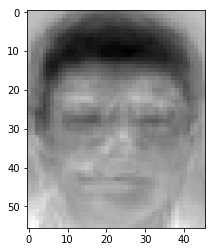

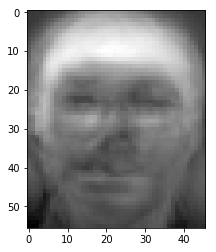

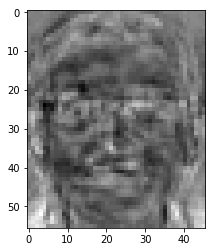

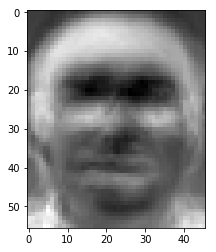

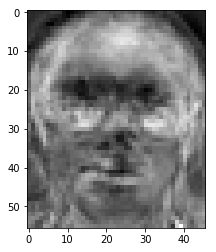

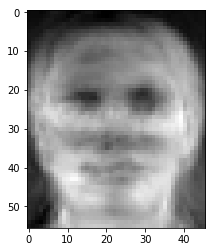

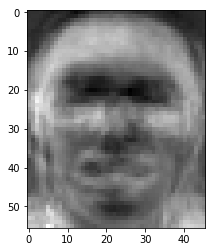

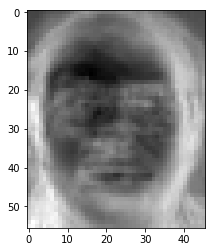

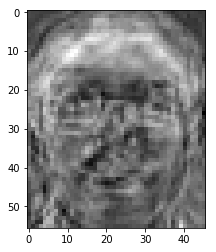

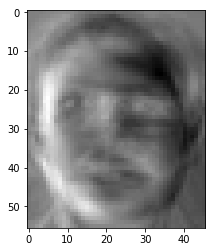

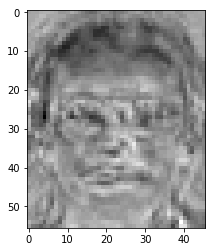

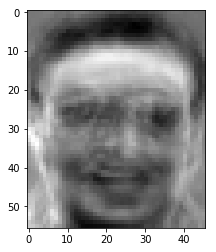

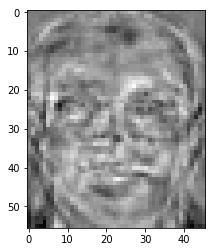

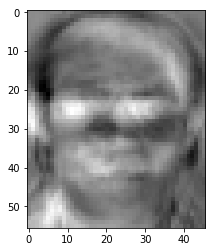

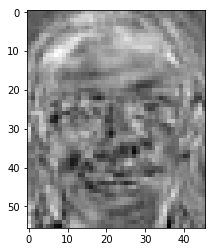

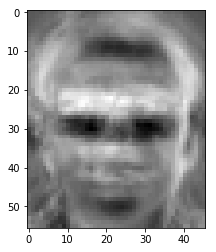

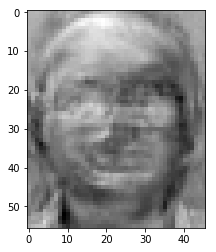

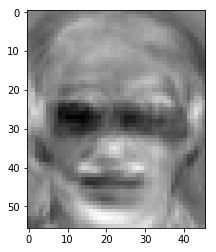

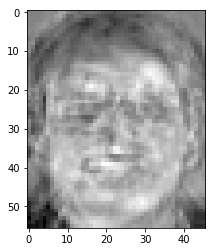

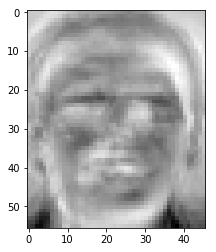

In [77]:
for i in range(10):
    spic(l[i].reshape((56,46)))
    spic(v[i].reshape((56,46)))

In [78]:
rep_lda = {}
for i in range(40):
    for j in range(10):
        rep_lda[i,j] = l.dot(xf[i,j].reshape(56*46))


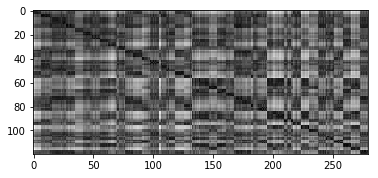

In [79]:
(d,t)= get_d_t(rep_lda)
sim2 = sim_matric(d,t)
spic(sim2)

In [80]:
tmax = np.amax(sim2)
tmin = np.amin(sim2)
print(tmax)
print(tmin)

432.8897978619936
3.5113915229551798


In [81]:
roc3 = roc(sim=sim2,tmax=tmax,tmin=tmin)

(0.9, 0.10146520146520147)


# 20
The combined PCA+LDA projection procedure is called fisherface. Calculate
the fisherfaces projection of all images. Do the simple face verification
experiment using fisherfaces. What is the EER and recall rate at 0.1%
FAR?

In [82]:
print(roc3['eer'])
print(recall_rate_at_false_alarm_rate(0.001,roc3))

0.10034340659340661
0.39285714285714285


# 21
Plot the RoC of all three experiments (No projection, PCA, and Fisher)
on the same axes. Compare and contrast the three results.

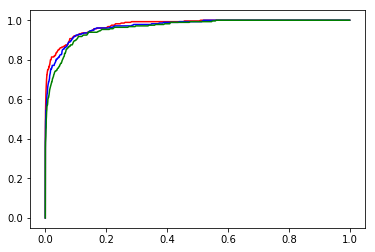

In [83]:
x = []
y = []

for a in roc_1['roc']:
    x.append(a[0])
    y.append(a[1])
plt.plot(y,x,c = 'r')
x = []
y = []

for a in roc2['roc']:
    x.append(a[0])
    y.append(a[1])
plt.plot(y,x,c = 'b')

x = []
y = []

for a in roc3['roc']:
    x.append(a[0])
    y.append(a[1])
plt.plot(y,x,c = 'g')

plt.show()

No projection (red) is best,<br>
PCA and LDA almost the same